In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
Groceries_df = pd.read_csv("Groceries_dataset.csv")
Groceries_df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [9]:
# Verify that a single userid has rated more than once
Groceries_df[Groceries_df["Member_number"]==1187]

,Member_number,Date,itemDescription
3,1187,12-12-2015,other vegetables
10958,1187,08-06-2014,soda
13614,1187,09-11-2014,citrus fruit
16152,1187,12-12-2015,onions
27107,1187,08-06-2014,soda
29763,1187,09-11-2014,domestic eggs
36091,1187,12-12-2015,shopping bags


In [10]:
Groceries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [18]:
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())

   Member_number        Date   itemDescription
0           1808  21-07-2015    tropical fruit
1           2552  05-01-2015        whole milk
2           2300  19-09-2015         pip fruit
3           1187  12-12-2015  other vegetables
4           3037  01-02-2015        whole milk
       Member_number        Date        itemDescription
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ 

In [21]:
import pandas as pd

# Assuming you already have a DataFrame loaded as 'df'
# Checking for null values
null_values = df.isnull().sum()

# Checking for duplicate rows
duplicates = df.duplicated().sum()

# Print the results
print("Null values per column:\n", null_values)
print("\nTotal duplicate rows: ", duplicates)

Null values per column:
 Member_number      0
Date               0
itemDescription    0
dtype: int64

Total duplicate rows:  759


In [22]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [25]:
# Example dataset: Load transactional data (Ensure your dataset is in the right format)
df = pd.read_csv("Groceries_dataset.csv")  # Replace with your CSV file

# Ensure all columns are Boolean (0s and 1s) for apriori
df_encoded = df.astype(bool)  # Convert numerical data to True/False

In [26]:
# Find frequent itemsets with a minimum support threshold
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
print(frequent_itemsets)

   support                                itemsets
0      1.0                         (Member_number)
1      1.0                                  (Date)
2      1.0                       (itemDescription)
3      1.0                   (Date, Member_number)
4      1.0        (itemDescription, Member_number)
5      1.0                 (itemDescription, Date)
6      1.0  (itemDescription, Date, Member_number)


In [27]:
# Generate association rules with confidence threshold
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules)

                         antecedents                       consequents  \
0                             (Date)                   (Member_number)   
1                    (Member_number)                            (Date)   
2                  (itemDescription)                   (Member_number)   
3                    (Member_number)                 (itemDescription)   
4                  (itemDescription)                            (Date)   
5                             (Date)                 (itemDescription)   
6            (itemDescription, Date)                   (Member_number)   
7   (itemDescription, Member_number)                            (Date)   
8              (Date, Member_number)                 (itemDescription)   
9                  (itemDescription)             (Date, Member_number)   
10                            (Date)  (itemDescription, Member_number)   
11                   (Member_number)           (itemDescription, Date)   

    antecedent support  consequent su

C:\Users\HP\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


    itemDescription  count
0        whole milk      2
1    tropical fruit      1
2         pip fruit      1
3  other vegetables      1


<Axes: xlabel='itemDescription', ylabel='count'>

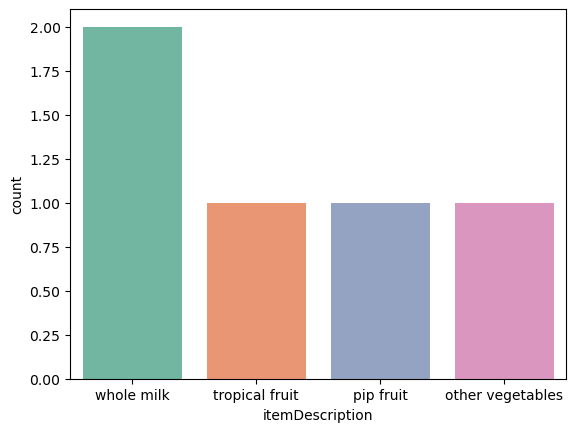

In [32]:
#Print bar chart for counting the ratings category-wise
counts = Groceries_df['itemDescription'].value_counts().reset_index()
print(counts)
plt.xlabel("itemDescription")
plt.ylabel("Counts")
sns.barplot(data=counts,x='itemDescription',y ='count',palette="Set2")

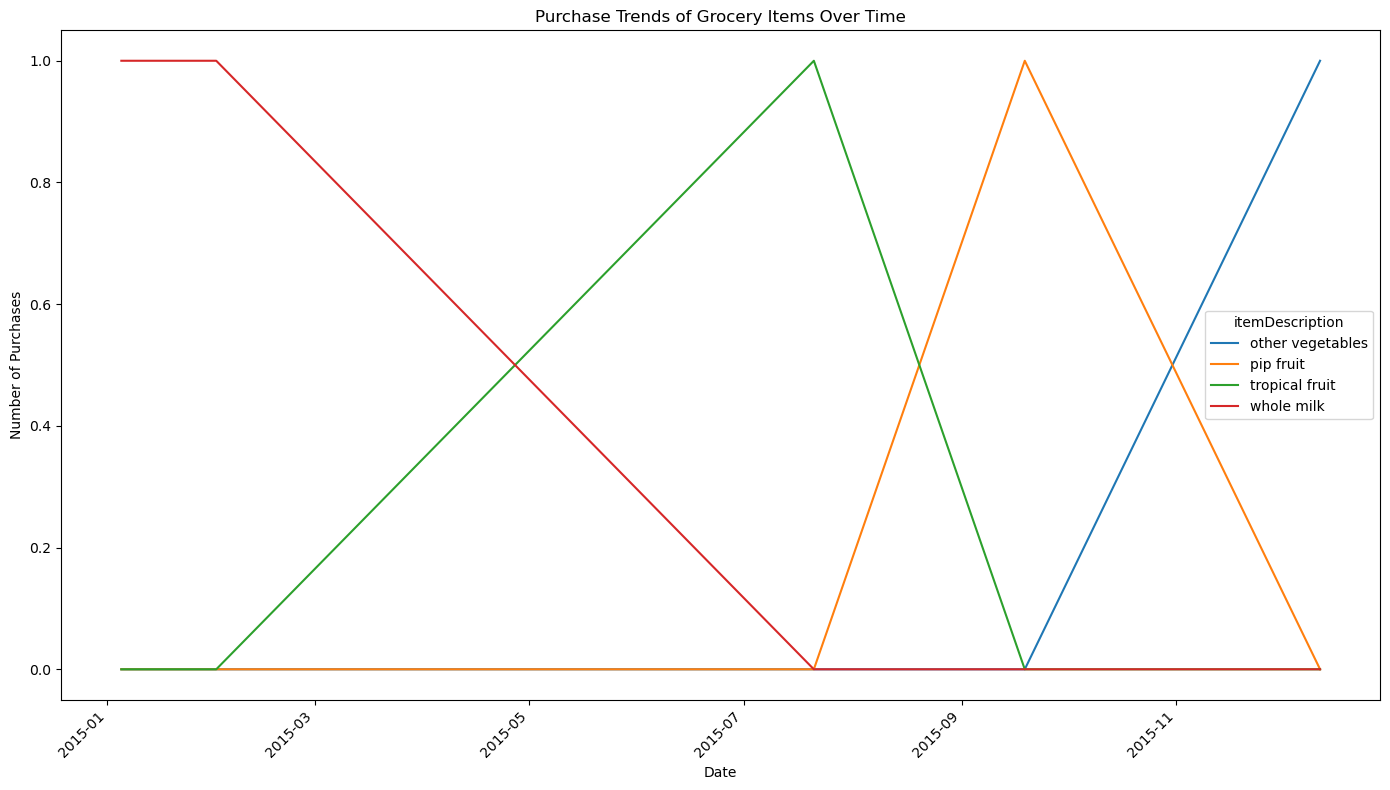

In [36]:

# Ensure the 'Date' column is in datetime format
Groceries_df['Date'] = pd.to_datetime(Groceries_df['Date'], format='%d-%m-%Y')

# Group by Date and itemDescription, and count the number of purchases for each item per day
daily_counts = Groceries_df.groupby(['Date', 'itemDescription']).size().reset_index(name='Count')

# Pivot the data to get itemDescription as columns
pivot_counts = daily_counts.pivot_table(index='Date', columns='itemDescription', values='Count', fill_value=0)

# Create the line plot
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed
sns.lineplot(data=pivot_counts, palette="tab10", dashes=False)

# Set labels and title
plt.xlabel("Date")
plt.ylabel("Number of Purchases")
plt.title("Purchase Trends of Grocery Items Over Time")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
